In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/Mall_Customers.csv')

In [3]:
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [4]:
df.shape

(200, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df.drop('CustomerID',axis =1 , inplace=True)

In [8]:
df.columns = [ 'Gender', 'Age', 'Annual Income','Spending Score']
df.head()

,Gender,Age,Annual Income,Spending Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Annual Income,200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Spending Score,200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


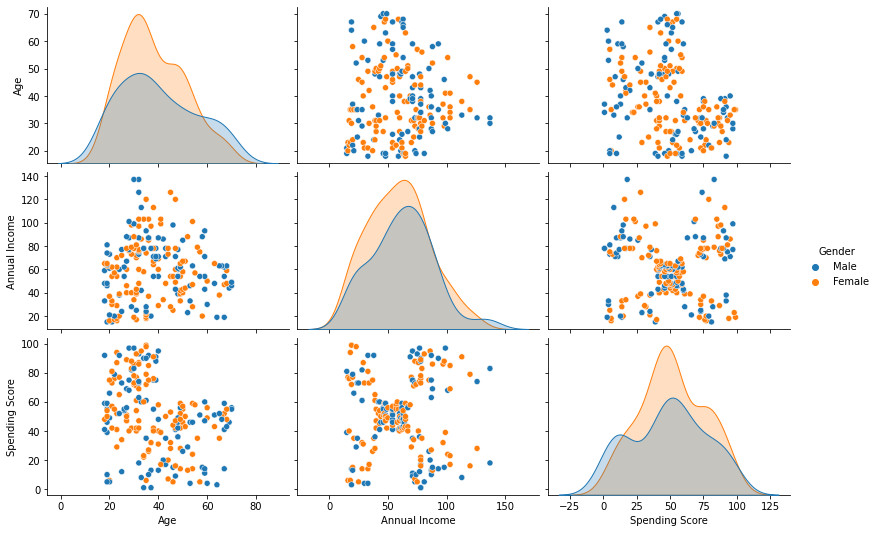

In [10]:
import seaborn as sns
sns.pairplot(df, hue = 'Gender', aspect = 1.5)

In [11]:
x = df[['Annual Income', 'Spending Score']]

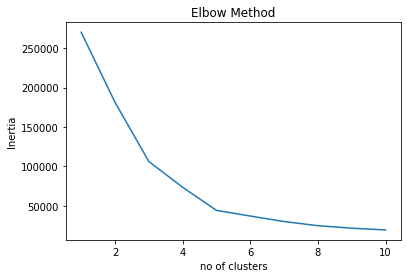

In [13]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

clusters = []


for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(x)
    clusters.append(kmeans.inertia_)


plt.plot(range(1,11),clusters)
plt.title('Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('Inertia')
plt.show() 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


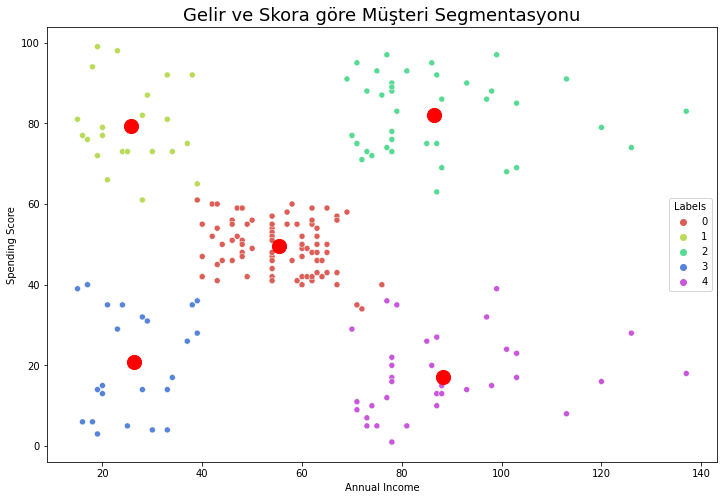

In [14]:
km_5 = KMeans(n_clusters=5, init='k-means++', random_state=0)
km_5.fit(x)
centroids = km_5.cluster_centers_
x['Labels'] = km_5.labels_


plt.figure(figsize=(12, 8))

sns.scatterplot(x['Annual Income'], x['Spending Score'], hue=x['Labels'], 
                palette=sns.color_palette('hls', 5))

plt.scatter(centroids[:,0], centroids[:,1], c='red',s=200)

plt.title('Gelir ve Skora göre Müşteri Segmentasyonu',fontsize=18)
plt.show()